In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.Age.value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [6]:
df.Age.value_counts()

Age
28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 88, dtype: int64

In [7]:
df.drop(columns = ['PassengerId','Name','Ticket','Cabin'],axis = 1,inplace = True)
df



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [8]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [9]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()


In [11]:
df['Sex'] = lb.fit_transform(df['Sex'])
df['Embarked'] = lb.fit_transform(df['Embarked'])

In [12]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [13]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

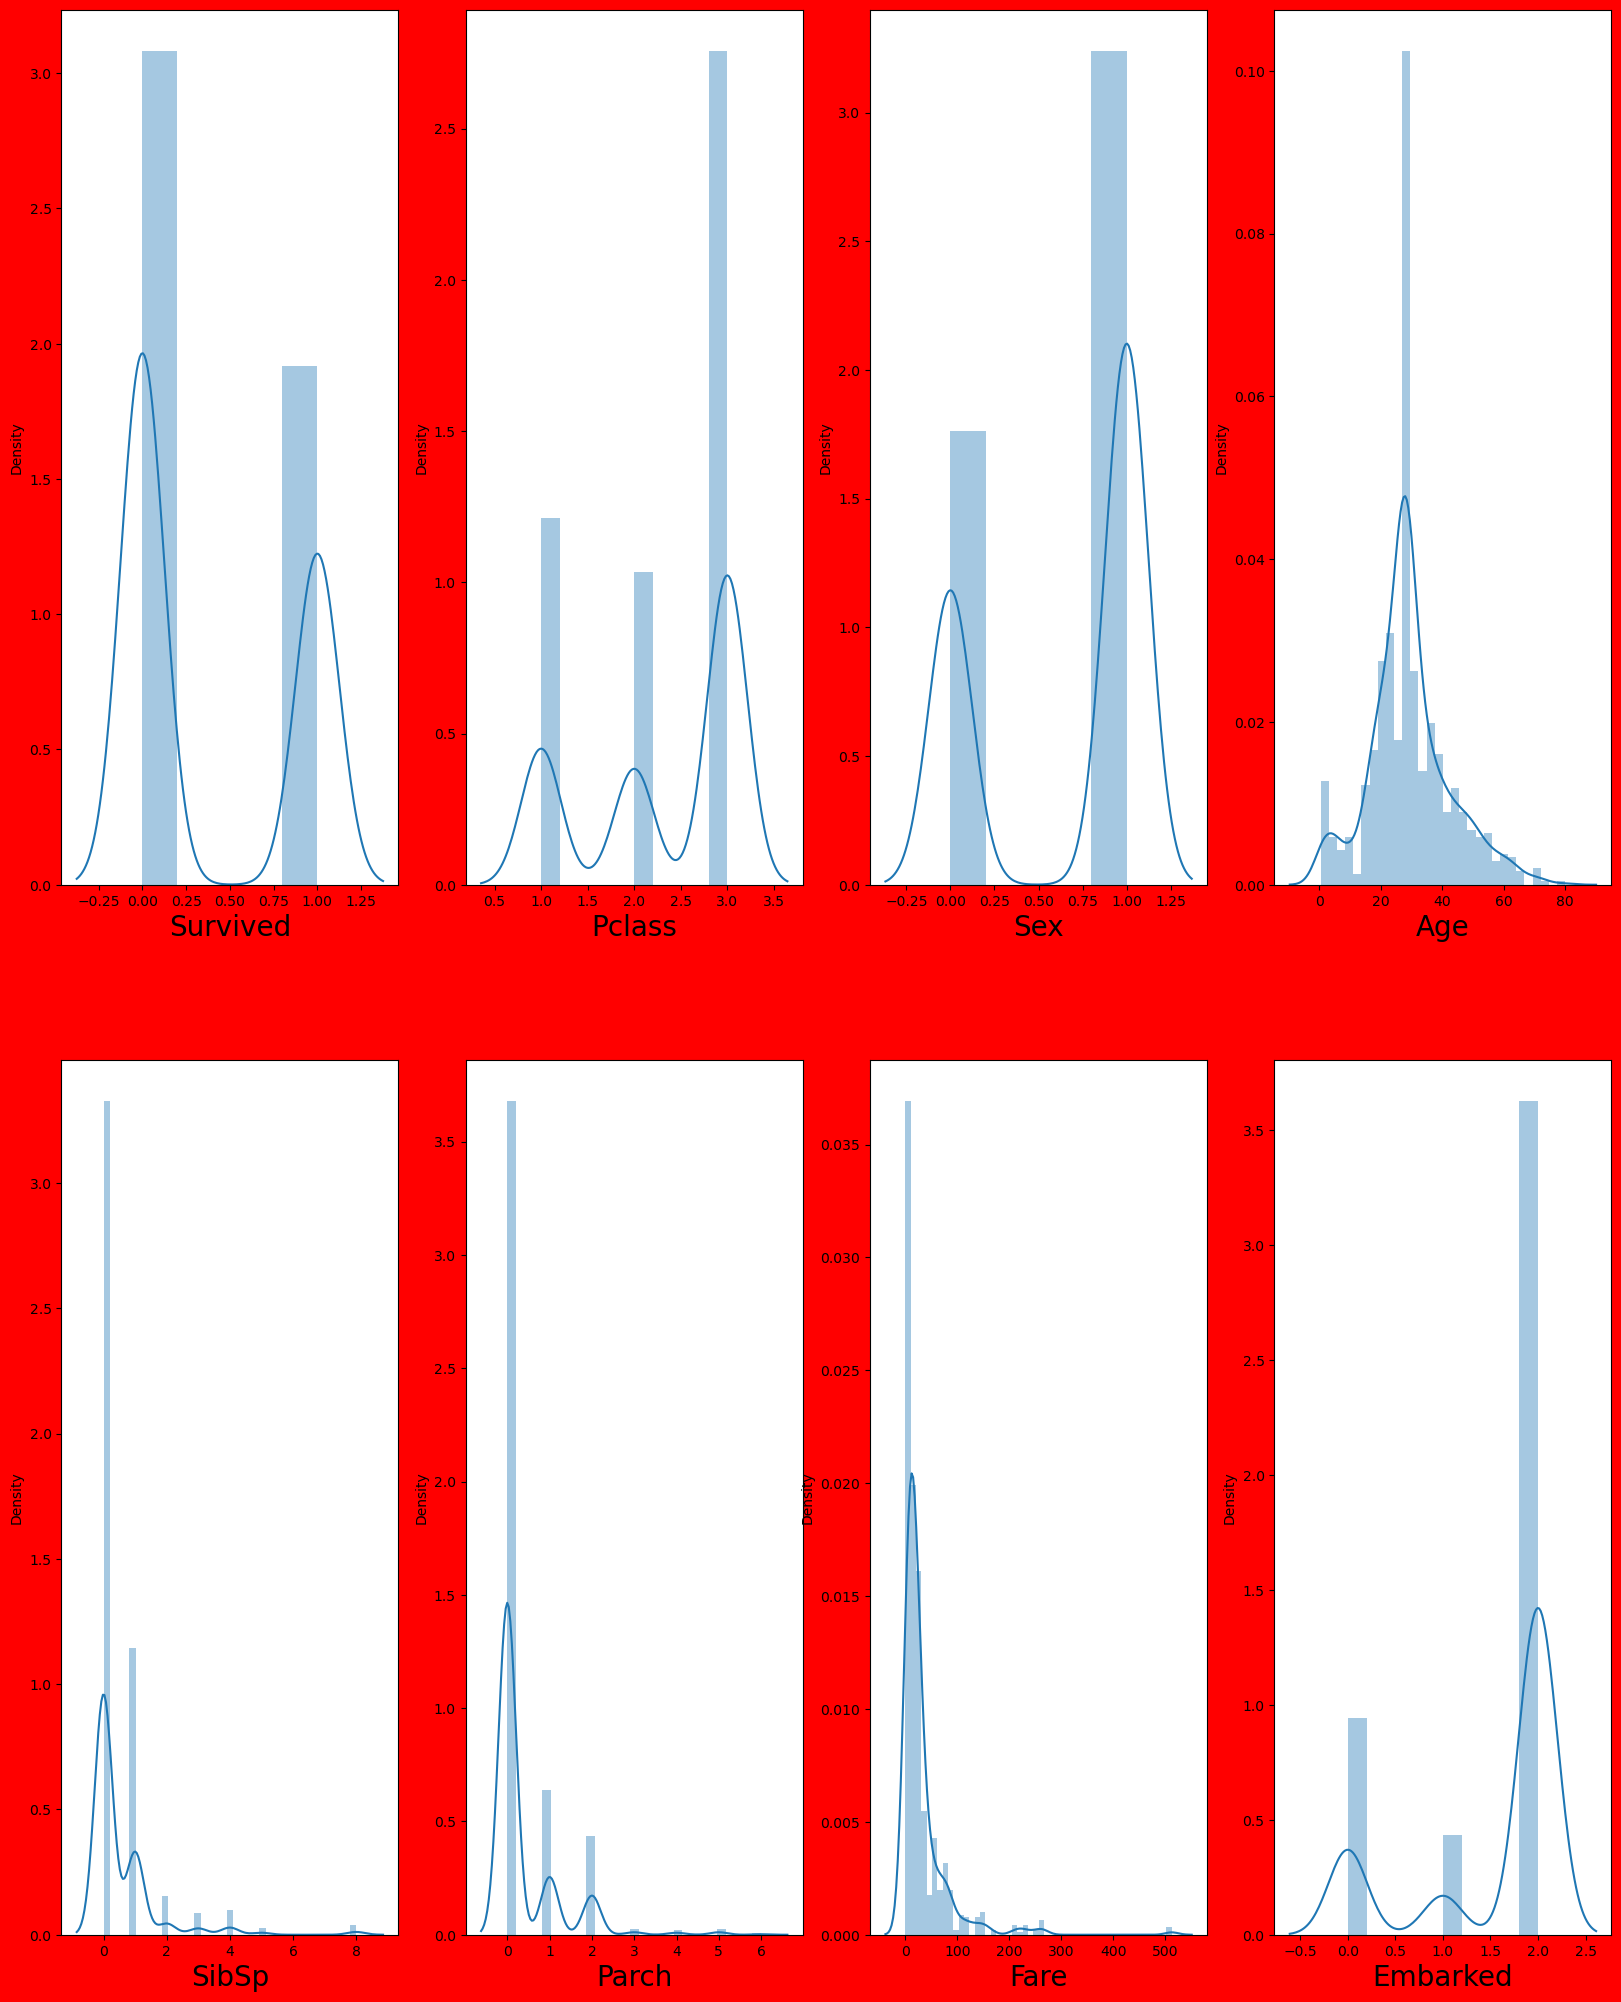

In [14]:
plt.figure(figsize = (20,25),facecolor = 'red')
plot_number = 1
for column in df:
    if plot_number <=8:
        ax = plt.subplot(2,4,plot_number)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plot_number+=1
plt.show()

In [15]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Survived
0    549
1    342
Name: count, dtype: int64


Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Sex
1    577
0    314
Name: count, dtype: int64


Age
28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 88, dtype: int64


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64


Embarked
2    646
0    168
1     77
Name: count, dtype: int64




<Axes: >

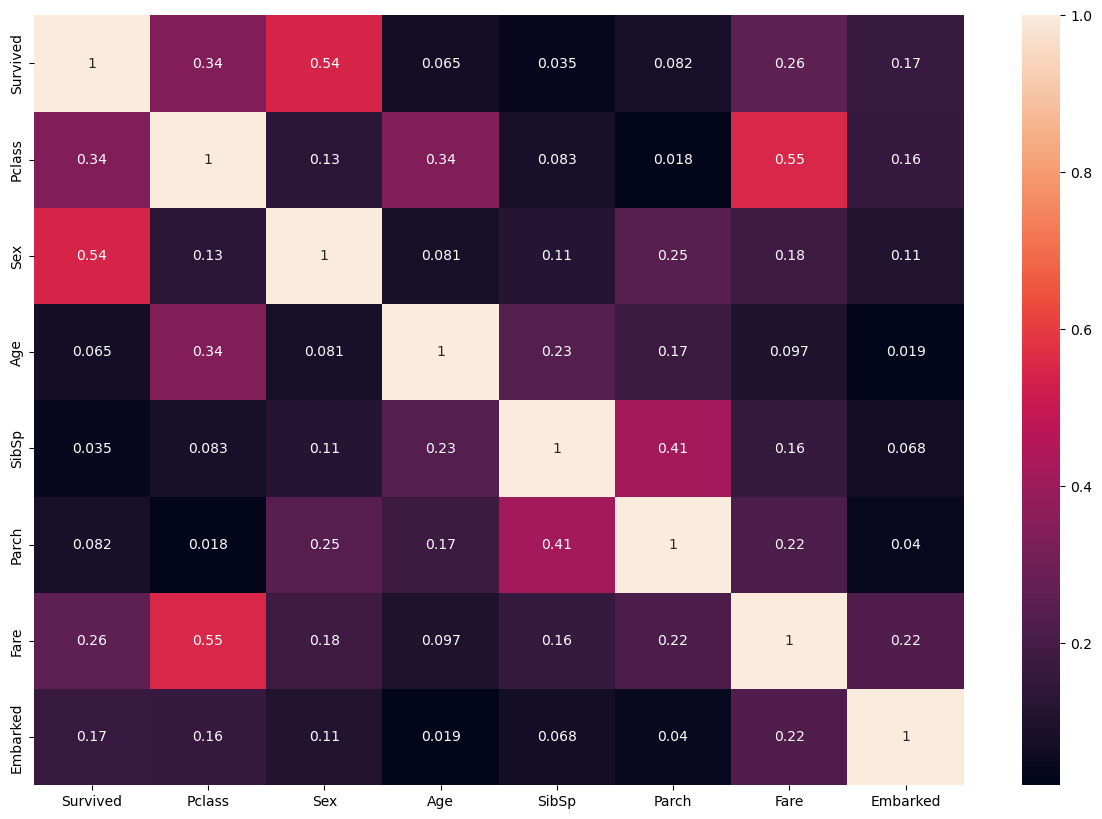

In [16]:
#Use Heatmap To Check Correlation
df_corr = df.corr().abs()
plt.figure(figsize = (15,10))
sns.heatmap(df_corr,annot = True,annot_kws={"size":10})

In [17]:
# from sklearn.feature_selection import SelectKBest, f_classif

In [18]:
X = df.iloc[:, [2,3, 4, 5, 6,7]]
y = df.iloc[:, 0]

In [19]:
X

,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,22.0,1,0,7.2500,2
1,0,38.0,1,0,71.2833,0
2,0,26.0,0,0,7.9250,2
3,0,35.0,1,0,53.1000,2
4,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...
886,1,27.0,0,0,13.0000,2
887,0,19.0,0,0,30.0000,2
888,0,28.0,1,2,23.4500,2
889,1,26.0,0,0,30.0000,0


In [20]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state=43)
y_train.head()

598    0
841    0
532    0
500    0
438    0
Name: Survived, dtype: int64

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report


In [25]:
#Iterate random state for select best data for train the model and enhance accuracy

Max_accuracy = 0
Max_random_s = 0
for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(X,y, train_size = 0.70, random_state = i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    y_pred = DTC.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    if accuracy>Max_accuracy:
        Max_accuracy = accuracy
        Max_random_s = i
print("Best Accuracy:-",Max_accuracy,"At This Ramdon State:-",Max_random_s)

Best Accuracy:- 0.8395522388059702 At This Ramdon State:- 215


In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,y, train_size = 0.70, random_state = 378)

In [27]:
#Train data on decision tree classifier

DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
#CHeck prediction according to train data on test data

y_pred = DTC.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report

In [30]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7649253731343284

In [31]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1
0,127,37
1,26,78


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       164
           1       0.68      0.75      0.71       104

    accuracy                           0.76       268
   macro avg       0.75      0.76      0.76       268
weighted avg       0.77      0.76      0.77       268



In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
#FOr model's hyperparameter tuning define some parameters to iterate

grid_parameter = {'criterion':['gini','antropy'],
                  'max_depth':range(10,25),
                 'min_samples_leaf': range(2,10),
                 'min_samples_split':range(3,15),
                 'max_leaf_nodes':range(5,25)}

In [35]:
#Use grid search cv for hyperparameter tuning

grid_search = GridSearchCV(estimator = DTC, param_grid = grid_parameter,cv = 5, n_jobs = -1)

In [36]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'antropy'],
                         'max_depth': range(10, 25),
                         'max_leaf_nodes': range(5, 25),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 15)})

In [37]:
#Select best parameteras

best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 7, 'min_samples_leaf': 5, 'min_samples_split': 3}


In [42]:
#Give best parameters to the model for tuning

DTC1 = DecisionTreeClassifier(criterion = 'gini', max_depth=10, max_leaf_nodes = 7, min_samples_leaf = 5, min_samples_split = 3)
DTC1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=7, min_samples_leaf=5,
                       min_samples_split=3)

In [43]:
#Check prediction againg on test data

y_pred1 = DTC1.predict(x_test)

In [44]:
accuracy1 = accuracy_score(y_test,y_pred1)
accuracy

0.7649253731343284

In [45]:
import pickle
model = pickle.dumps(DTC1)
saved_model = pickle.loads(model)